<a href="https://colab.research.google.com/github/elinteerie/Personal-Insurance-Charge-Model-/blob/main/Personal_Insurance_Charge_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import Libraries

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [4]:
#Ploting Function of Results



def plot_predictions(train_data =X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions =y_preds):
  """ Plot training Data and test data"""

  plt.figure(figsize=(10,7))
  #Plot the trainingg set
  plt.scatter (train_data, train_label, c="b", label = 'Training Data')
  #Plot the test set
  plt.scatter(test_label, test_data, c= 'g', label ='Test  Data' )
  #Plot model Prediction in red
  plt.scatter(test_data, predictions, c = 'r', label ='Prediction')
  #Show the legend
  plt.legend();



#Build metrics Function

def metric_func(y_true =y_test,
                y_pred = y_preds):
  mae = tf.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.metrics.mean_squared_error(y_true,y_pred)
  return mae, mse

NameError: ignored

In [5]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Comvert all Non-Numerical to Numerical with onehot enconder

insurance_onehot= pd.get_dummies(insurance)
insurance_onehot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [8]:
#Create X and Y (Features and Labels)
X  = insurance_onehot.drop('charges', axis=1)
y = insurance_onehot['charges']


In [9]:
#Split the Data Set into Training and Test Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state = 42)

In [41]:
#Build a Model


# Set a random seed

tf.random.set_seed(42)

# 1. Create a module using the sequential API
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(500), 
  tf.keras.layers.Dense(450),                                      
  tf.keras.layers.Dense(400),                                      
  tf.keras.layers.Dense(350),                                      
  tf.keras.layers.Dense(300),
  tf.keras.layers.Dense(250),
  tf.keras.layers.Dense(200),                                         
  tf.keras.layers.Dense(100),  
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
              optimizer =tf.keras.optimizers.Adam(lr = 0.0001),
              metrics= ['mae'])

#Fit the model
# model.fit(X,y, epochs=10)
history = insurance_model.fit(X_train, y_train, epochs=200) 
          






Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 1s 13ms/step - loss: 11578.4326 - mae: 11578.4326
Epoch 2/200
34/34 [==============================] - 0s 13ms/step - loss: 7425.0322 - mae: 7425.0322
Epoch 3/200
34/34 [==============================] - 0s 12ms/step - loss: 7055.3843 - mae: 7055.3843
Epoch 4/200
34/34 [==============================] - 0s 13ms/step - loss: 6868.3320 - mae: 6868.3320
Epoch 5/200
34/34 [==============================] - 0s 14ms/step - loss: 6835.6733 - mae: 6835.6733
Epoch 6/200
34/34 [==============================] - 0s 12ms/step - loss: 6760.5361 - mae: 6760.5361
Epoch 7/200
34/34 [==============================] - 0s 13ms/step - loss: 6762.0527 - mae: 6762.0527
Epoch 8/200
34/34 [==============================] - 0s 13ms/step - loss: 6732.5908 - mae: 6732.5908
Epoch 9/200
34/34 [==============================] - 0s 13ms/step - loss: 6734.0620 - mae: 6734.0620
Epoch 10/200
34/34 [==============================] - 0s 13ms/step - loss: 6685.9385 - mae: 6685.9385

In [ ]:
#Evaluate the model

In [42]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 3177.3101 - mae: 3177.3101


[3177.31005859375, 3177.31005859375]

In [43]:
 y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

Text(0.5, 0, 'epochs')

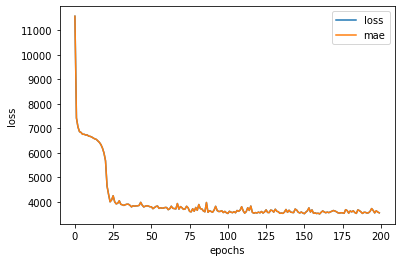

In [44]:
#Plot the History

pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')